## DataWarehousing(Physical Implementation)

In [7]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [2]:
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  )
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
    return connection

### CREATING DATABASE "hospital_warehouse"

In [3]:
try:
    connection = connect()
    query = "CREATE DATABASE hospital_warehouse;"
    
    
    cursor = connection.cursor()
    
    # Executing a SQL query
    cursor.execute(query)
    print("Database sucessfully created")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Database sucessfully created

PostgreSQL connection is closed


#### Defining connect() method so we can use it laster through out our code

In [5]:
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  database="hospital_warehouse")
    
    return connection

### Creating tables in the database hospital_warehouse

In [175]:
import logging
try:
    connection = connect()
    
    cursor = connection.cursor()
    
    query_1 = '''
    CREATE TABLE department(
        department_id CHAR(5) PRIMARY KEY,
        department_name TEXT
        
    );
    '''
    
    cursor.execute(query_1)
    
    query_2 = '''
    CREATE TABLE employee(
        employee_id INTEGER PRIMARY KEY,
        first_name TEXT,
        last_name TEXT,
        department_id CHAR(5),
        manager_employee_id INTEGER,
        employee_role TEXT,
        salary MONEY NOT NULL,
        hire_date DATE NOT NULL,
        terminated_date DATE NOT NULL,
        terminated_reason TEXT,
        dob DATE NOT NULL,
        fte FLOAT,
        LOCATION TEXT,
        
        CONSTRAINT fk_employee_department_department_id
        FOREIGN KEY(department_id) REFERENCES department(department_id)
        
    );
    '''
    
    cursor.execute(query_2)
    
    query_3 = '''
    CREATE TABLE punch_apply_date(
        date DATE PRIMARY KEY,
        day_of_month VARCHAR(2),
        month VARCHAR(2),
        year CHAR(4),
        week_day CHAR
        
        
    );
    '''
    
    cursor.execute(query_3)
    
    query_4 = '''
    CREATE TABLE paycode(
        id CHAR PRIMARY KEY,
        paycode_name TEXT
    );
    '''
    
    cursor.execute(query_4)
    
    query_5 = '''
    CREATE TABLE attendence(
        id SERIAL PRIMARY KEY,
        employee_id INTEGER,
        cost_center CHAR(5),
        punch_in_time TIMESTAMP,
        punch_out_time TIMESTAMP,
        punch_apply_date DATE,
        paycode_id CHAR,
        hours_worked FLOAT,
        
        CONSTRAINT fk_attendence_employee_employee_id
        FOREIGN KEY(employee_id) REFERENCES employee(employee_id),
        
        CONSTRAINT fk_attendence_punch_apply_date_date
        FOREIGN KEY(punch_apply_date) REFERENCES punch_apply_date(date),
        
        CONSTRAINT fk_attendence_paycode_id
        FOREIGN KEY(paycode_id) REFERENCES paycode(id)
        
        
    );
    '''
    
    cursor.execute(query_5)
    
    
    
    connection.commit()
    
    
    
    print("Tables sucessfully created")
except (Exception,psycopg2.Error) as error:
    #print("Error while connecting to PostgresSQL: ",error)
    #print(error)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Tables sucessfully created

PostgreSQL connection is closed


## Data preprocession and population the data into warehouse

In [9]:
import pandas as pd
import logging

In [177]:
employee_2021_08_01 = pd.read_excel('data/employee_2021_08_01.xlsx')

In [178]:
employee_2021_08_02 = pd.read_excel('data/employee_2021_08_02.xlsx')

In [179]:
employee_2021_08_03 = pd.read_excel('data/employee_2021_08_03.xlsx')

In [180]:
employee_2021_08_02 == employee_2021_08_03

,employee_id,first_name,last_name,department_id,department_name,manager_employee_id,employee_role,salary,hire_date,terminated_date,terminated_reason,dob,fte,location
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,False,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,False,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True,True,True
5,True,True,True,True,True,True,True,True,True,True,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,False,True,True,True
7,True,True,True,True,True,True,True,True,True,True,False,True,True,True
8,True,True,True,True,True,True,True,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [181]:
employee_2021_08_02.iloc[14]

employee_id                          5011018.0
first_name                                Rani
last_name                              NEOPANE
department_id                          51120.0
department_name           NFS NCCH - Starbucks
manager_employee_id                  1977006.0
employee_role          Food Services Associate
salary                                  5601.0
hire_date                  2016-10-24 00:00:00
terminated_date                     01-01-1700
terminated_reason                          NaN
dob                        1983-12-12 00:00:00
fte                                        1.0
location                             Kathmandu
Name: 14, dtype: object

In [182]:
employee_2021_08_03.iloc[14]

employee_id                            5011018.0
first_name                                  Rani
last_name                                NEOPANE
department_id                            54013.0
department_name        Medical Telecommunicators
manager_employee_id                    1377208.0
employee_role            Food Services Associate
salary                                   10500.0
hire_date                    2016-10-24 00:00:00
terminated_date                       01-01-1700
terminated_reason                            NaN
dob                          1983-12-12 00:00:00
fte                                          1.0
location                                 Pokhara
Name: 14, dtype: object

## Checking into department 

In [183]:
employee_2021_08_03['department_name'].count()

31

In [184]:
employee_2021_08_03['department_name'].unique()

array(['Medical Telecommunicators', 'HMOB GI Procedure',
       'NFS Retail Services', 'Patient Equipment Service',
       'CD Operations', 'NFS NCCH - Starbucks', '4 Oncology',
       'HMOB GI Clinic', 'Linen Room & Laundry'], dtype=object)

In [185]:
employee_2021_08_03['department_id'].unique()

array([54013., 31288., 51100., 18048., 55050., 51120., 11151., 31285.,
       53410.])

In [186]:
len(employee_2021_08_03['department_id'].unique())

9

In [187]:
len(employee_2021_08_03['department_name'].unique())

9

In [188]:
df_department = employee_2021_08_03[['department_id','department_name']]

In [189]:
department = {}
for row in df_department.itertuples(index=False):
    id=int(row.department_id)
    department[id] = row.department_name

In [190]:
department

{54013: 'Medical Telecommunicators',
 31288: 'HMOB GI Procedure',
 51100: 'NFS Retail Services',
 18048: 'Patient Equipment Service',
 55050: 'CD Operations',
 51120: 'NFS NCCH - Starbucks',
 11151: '4 Oncology',
 31285: 'HMOB GI Clinic',
 53410: 'Linen Room & Laundry'}

In [191]:
df_department = pd.DataFrame(list(department.items()),columns=['id','department_name'])

In [192]:
df_department

,id,department_name
0,54013,Medical Telecommunicators
1,31288,HMOB GI Procedure
2,51100,NFS Retail Services
3,18048,Patient Equipment Service
4,55050,CD Operations
5,51120,NFS NCCH - Starbucks
6,11151,4 Oncology
7,31285,HMOB GI Clinic
8,53410,Linen Room & Laundry


#### pushing above dataframe into table "department"

In [193]:
import logging
try:
    connection = connect()
    cursor = connection.cursor()
    
    for key,value in department.items():
        query = "INSERT INTO department VALUES(%s,%s)"
        cursor.execute(query,(key,value))
        connection.commit()
    print("Data sucessfully inserted into department")
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Data sucessfully inserted into department

PostgreSQL connection is closed


## Checking into employee table(dimention table)

In [194]:
employee_2021_08_03.columns

Index(['employee_id', 'first_name', 'last_name', 'department_id',
       'department_name', 'manager_employee_id', 'employee_role', 'salary',
       'hire_date', 'terminated_date', 'terminated_reason', 'dob', 'fte',
       'location'],
      dtype='object')

In [195]:
employee_table = employee_2021_08_03[['employee_id', 'first_name', 'last_name', 'department_id', 
                  'manager_employee_id', 'employee_role', 'salary',
                   'hire_date', 'terminated_date', 'terminated_reason', 'dob', 'fte',
                   'location']]

In [196]:
employee_table.dtypes

employee_id                   float64
first_name                     object
last_name                      object
department_id                 float64
manager_employee_id            object
employee_role                  object
salary                        float64
hire_date              datetime64[ns]
terminated_date                object
terminated_reason              object
dob                    datetime64[ns]
fte                           float64
location                       object
dtype: object

In [197]:
len(employee_table.columns)

13

### Inserting into employee table of database

In [198]:
import logging
try:
    connection = connect()
    cursor = connection.cursor()
    
    for row in employee_table.itertuples(index=False):
        query = "INSERT INTO employee VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        try:
            data = [int(row.employee_id) , row.first_name , row.last_name , int(row.department_id)
               ,int(row.manager_employee_id),row.employee_role,row.salary,row.hire_date,row.terminated_date,row.terminated_reason,row.dob
               ,row.fte,row.location]
        except:
            data = [int(row.employee_id) , row.first_name , row.last_name , int(row.department_id)
               ,row.manager_employee_id,row.employee_role,row.salary,row.hire_date,row.terminated_date,row.terminated_reason,row.dob
               ,row.fte,row.location]
        #print(data)
        if data[4]=='-':
            data[4]=None
        else:
            data[4]=int(data[4])
        if str(data[9])=='nan':
            data[9]=None
        
        print(data)
            
            
            
            
        cursor.execute(query,data)
        connection.commit()
    print("Data sucessfully inserted into employee")
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

[1377208, 'Tushar', 'NIYOGI', 54013, None, 'Med Telecomm Coordinator', 9893.0, Timestamp('2001-03-26 00:00:00'), datetime.datetime(2021, 8, 1, 0, 0), 'Contract Expired', Timestamp('1958-02-20 00:00:00'), 1.0, 'Pokhara']
[1672200, 'Kabir', 'Jamarkattel', 31288, 5014147, 'Clinical Nurse-II', 7184.0, Timestamp('2009-09-08 00:00:00'), '01-01-1700', None, Timestamp('1963-03-18 00:00:00'), 0.8, 'Kathmandu']
[1977006, 'Balgovind', 'Baidhya', 51100, None, 'Food Services Mgr I', 11885.0, Timestamp('2007-05-21 00:00:00'), '01-01-1700', None, Timestamp('1982-07-13 00:00:00'), 1.0, 'Hetauda']
[3974506, 'Shambhu', 'Bhattacharya', 54013, 1377208, 'Med Ctr Telecom Spec', 11331.0, Timestamp('2016-08-15 00:00:00'), '01-01-1700', None, Timestamp('1990-03-14 00:00:00'), 1.0, 'Pokhara']
[4019778, 'Jitendra', 'Tripathee', 51100, 1977006, 'Food Services Supv', 7435.0, Timestamp('2013-01-06 00:00:00'), '01-01-1700', None, Timestamp('1990-10-10 00:00:00'), 1.0, 'Pokhara']
[4024378, 'Kundan', 'Dangi', 18048, 5

## Checking into timesheet_2021_05_23,timesheet_2021_06_23,timesheet_2021_07_24 file

In [199]:
timesheet_2021_05_23 = pd.read_excel('data/timesheet_2021_05_23.xlsx')

In [200]:
timesheet_2021_06_23 = pd.read_excel('data/timesheet_2021_06_23.xlsx')

In [201]:
timesheet_2021_07_24 = pd.read_excel('data/timesheet_2021_07_24.xlsx')

In [202]:
timesheet = pd.concat([timesheet_2021_05_23,timesheet_2021_06_23,timesheet_2021_07_24])

In [203]:
timesheet.shape

(4365, 7)

In [204]:
timesheet['paycode'].head(10)

0     CHARGE
1        WRK
2      BREAK
3        WRK
4    ON_CALL
5        WRK
6     ABSENT
7     ABSENT
8        WRK
9      BREAK
Name: paycode, dtype: object

In [205]:
timesheet['paycode'].unique()

array(['CHARGE', 'WRK', 'BREAK', 'ON_CALL', 'ABSENT'], dtype=object)

In [206]:
len(timesheet_2021_05_23['paycode'].unique())

5

In [207]:
pay_code = list()

Total number of paycode types

In [208]:
paycode = {
    'A':timesheet_2021_05_23['paycode'].unique()[0],
    'B':timesheet_2021_05_23['paycode'].unique()[1],
    'C':timesheet_2021_05_23['paycode'].unique()[2],
    'D':timesheet_2021_05_23['paycode'].unique()[3],
    'E':timesheet_2021_05_23['paycode'].unique()[4]
}

In [209]:
paycode

{'A': 'CHARGE', 'B': 'WRK', 'C': 'BREAK', 'D': 'ON_CALL', 'E': 'ABSENT'}

### Inserting into table paycode of database

In [210]:
import logging
try:
    connection = connect()
    cursor = connection.cursor()
    query="INSERT INTO paycode VALUES(%s,%s)"
    for key , value in paycode.items():
        cursor.execute(query,(key,value))
        connection.commit()
    print("Data sucessfully inserted into table paycode")
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Data sucessfully inserted into table paycode

PostgreSQL connection is closed


## Checking into punch_apply_date from timesheet file

In [211]:
from datetime import datetime

In [212]:
timesheet['punch_apply_date']

0      2021-04-23
1      2021-04-23
2      2021-04-23
3      2021-04-23
4      2021-04-23
          ...    
1472   2021-07-23
1473   2021-07-23
1474   2021-07-23
1475   2021-07-23
1476   2021-07-23
Name: punch_apply_date, Length: 4365, dtype: datetime64[ns]

In [213]:
punch_apply_date = {}
for item in timesheet['punch_apply_date']:
    row=[]
    if item in punch_apply_date:
        pass
    else:
        #row.append(str(item)[:10])
        row.append(str(item)[8:10])
        row.append(str(item)[5:7])
        row.append(str(item)[:4])
        row.append(item.weekday())
        
        punch_apply_date[str(item)[:10]]=row
    
        
    
    

In [214]:
punch_apply_date

{'2021-04-23': ['23', '04', '2021', 4],
 '2021-04-24': ['24', '04', '2021', 5],
 '2021-04-25': ['25', '04', '2021', 6],
 '2021-04-26': ['26', '04', '2021', 0],
 '2021-04-27': ['27', '04', '2021', 1],
 '2021-04-28': ['28', '04', '2021', 2],
 '2021-04-29': ['29', '04', '2021', 3],
 '2021-04-30': ['30', '04', '2021', 4],
 '2021-05-01': ['01', '05', '2021', 5],
 '2021-05-02': ['02', '05', '2021', 6],
 '2021-05-03': ['03', '05', '2021', 0],
 '2021-05-04': ['04', '05', '2021', 1],
 '2021-05-05': ['05', '05', '2021', 2],
 '2021-05-06': ['06', '05', '2021', 3],
 '2021-05-07': ['07', '05', '2021', 4],
 '2021-05-08': ['08', '05', '2021', 5],
 '2021-05-09': ['09', '05', '2021', 6],
 '2021-05-10': ['10', '05', '2021', 0],
 '2021-05-11': ['11', '05', '2021', 1],
 '2021-05-12': ['12', '05', '2021', 2],
 '2021-05-13': ['13', '05', '2021', 3],
 '2021-05-14': ['14', '05', '2021', 4],
 '2021-05-15': ['15', '05', '2021', 5],
 '2021-05-16': ['16', '05', '2021', 6],
 '2021-05-17': ['17', '05', '2021', 0],


### Inserting the date,day,month,year into the Database table "punch_apply_date"

In [216]:
import logging
try:
    connection = connect()
    cursor = connection.cursor()
    
    query="INSERT INTO punch_apply_date VALUES(%s,%s,%s,%s,%s)"
    for key,value in punch_apply_date.items():
        cursor.execute(query,(key,value[0],value[1],value[2],value[3]))
        connection.commit()
    print("Data sucessfully inserted into table punch_apply_date")
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Data sucessfully inserted into table punch_apply_date

PostgreSQL connection is closed


## Checking Into timesheets

In [217]:
timesheet.head()

,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,hours_worked,paycode
0,1377208.0,53410.0,NaT,NaT,2021-04-23,1.0,CHARGE
1,1377208.0,53410.0,2021-04-23 14:10:00,2021-04-23 18:45:00,2021-04-23,4.6,WRK
2,1377208.0,53410.0,NaT,NaT,2021-04-23,0.7,BREAK
3,1377208.0,53410.0,2021-04-23 19:24:00,2021-04-23 22:10:00,2021-04-23,2.8,WRK
4,1672200.0,11151.0,NaT,NaT,2021-04-23,5.0,ON_CALL


In [218]:
str(timesheet.iloc[0][2]) == 'NaT'

True

In [219]:
timesheet.columns

Index(['employee_id', 'cost_center', 'punch_in_time', 'punch_out_time',
       'punch_apply_date', 'hours_worked', 'paycode'],
      dtype='object')

In [220]:
paycode

{'A': 'CHARGE', 'B': 'WRK', 'C': 'BREAK', 'D': 'ON_CALL', 'E': 'ABSENT'}

In [221]:
paycode_list=[]
for item in timesheet['paycode']:
    paycode_list.append(list(paycode.keys())[list(paycode.values()).index(item)])
            

In [222]:
timesheet['paycode_id'] = paycode_list

In [223]:
timesheet = timesheet[['employee_id', 'cost_center', 'punch_in_time', 'punch_out_time',
       'punch_apply_date', 'paycode_id','hours_worked']]

In [224]:
timesheet.head()

,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked
0,1377208.0,53410.0,NaT,NaT,2021-04-23,A,1.0
1,1377208.0,53410.0,2021-04-23 14:10:00,2021-04-23 18:45:00,2021-04-23,B,4.6
2,1377208.0,53410.0,NaT,NaT,2021-04-23,C,0.7
3,1377208.0,53410.0,2021-04-23 19:24:00,2021-04-23 22:10:00,2021-04-23,B,2.8
4,1672200.0,11151.0,NaT,NaT,2021-04-23,D,5.0


### Inserting into database of table "attendence"

In [225]:
import logging
try:
    connection = connect()
    cursor = connection.cursor()
    
    data = [list(x) for x in timesheet.itertuples(index=False)]
    query = "INSERT INTO attendence VALUES(%s,%s,%s,%s,%s,%s,%s,%s)"
      
    for i,item in enumerate(data,1):
        item[0] = int(item[0])
        item[1] = int(item[1])
        if str(item[2])=='NaT':
            item[2]=None
        if str(item[3])=='NaT':
            item[3]=None
        
        
            
            
            
        cursor.execute(query,(i,item[0],item[1],item[2],item[3],item[4],item[5],item[6]))
        connection.commit()
    print("Data sucessfully inserted into attendence")
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Data sucessfully inserted into attendence

PostgreSQL connection is closed


# Requirements

In [226]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    SELECT * FROM 
    attendence
    LIMIT(20)
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked
0,1,1377208,53410,NaT,NaT,2021-04-23,A,1.0
1,2,1377208,53410,2021-04-23 14:10:00,2021-04-23 18:45:00,2021-04-23,B,4.6
2,3,1377208,53410,NaT,NaT,2021-04-23,C,0.7
3,4,1377208,53410,2021-04-23 19:24:00,2021-04-23 22:10:00,2021-04-23,B,2.8
4,5,1672200,11151,NaT,NaT,2021-04-23,D,5.0
5,6,1672200,11151,2021-04-23 06:12:00,2021-04-23 09:12:00,2021-04-23,B,3.0
6,7,1977006,54013,NaT,NaT,2021-04-23,E,8.0
7,8,3974506,31288,NaT,NaT,2021-04-23,E,8.0
8,9,4019778,54013,2021-04-23 06:05:00,2021-04-23 09:44:00,2021-04-23,B,3.7
9,10,4019778,54013,NaT,NaT,2021-04-23,C,0.8


# a.

### LOOKING FOR AN PARTICULAR EMPLOYEE , 1377208 , was working on a particular day or not

In [227]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
    
    
    SELECT * FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND a.punch_apply_date='2021-05-10' 
        AND paycode.paycode_name != 'BREAK'
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked,date,day_of_month,month,year,week_day,id,paycode_name
0,764,1377208,53410,NaT,NaT,2021-05-10,A,1.0,2021-05-10,10,05,2021,0,A,CHARGE
1,765,1377208,53410,2021-05-10 14:05:00,2021-05-10 16:42:00,2021-05-10,B,2.6,2021-05-10,10,05,2021,0,B,WRK
2,767,1377208,53410,2021-05-10 17:39:00,2021-05-10 22:05:00,2021-05-10,B,4.4,2021-05-10,10,05,2021,0,B,WRK


In [228]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT sum(hours_worked) AS "Total Hours worked at date 2021-05-10 by employee 1377208" FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND a.punch_apply_date='2021-05-10' 
        AND paycode.paycode_name != 'BREAK'
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,Total Hours worked at date 2021-05-10 by employee 1377208
0,8.0


### charge on the day.

In [229]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT * FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND a.punch_apply_date='2021-05-10' 
        AND paycode.paycode_name = 'CHARGE'
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked,date,day_of_month,month,year,week_day,id,paycode_name
0,764,1377208,53410,None,None,2021-05-10,A,1.0,2021-05-10,10,05,2021,0,A,CHARGE


### on call?

In [230]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT * FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND a.punch_apply_date='2021-05-10' 
        AND paycode.paycode_name = 'ONCALL'
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked,date,day_of_month,month,year,week_day,id,paycode_name


# C

week_day = 5 ==saturday , week_day = 6 ==sunday

for employee_id = 1377208 working on sunday and saturday

In [13]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT * FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND p.week_day IN ('5','6')
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked,date,day_of_month,month,year,week_day,id,paycode_name
0,93,1377208,53410,NaT,NaT,2021-04-25,E,8.0,2021-04-25,25,04,2021,6,E,ABSENT
1,372,1377208,53410,NaT,NaT,2021-05-01,E,8.0,2021-05-01,01,05,2021,5,E,ABSENT
2,408,1377208,53410,NaT,NaT,2021-05-02,E,8.0,2021-05-02,02,05,2021,6,E,ABSENT
3,702,1377208,53410,NaT,NaT,2021-05-08,E,8.0,2021-05-08,08,05,2021,5,E,ABSENT
4,729,1377208,53410,NaT,NaT,2021-05-09,E,8.0,2021-05-09,09,05,2021,6,E,ABSENT
5,1056,1377208,53410,NaT,NaT,2021-05-16,E,8.0,2021-05-16,16,05,2021,6,E,ABSENT
6,1379,1377208,53410,2021-05-22 06:13:00,2021-05-22 09:51:00,2021-05-22,B,3.6,2021-05-22,22,05,2021,5,B,WRK
7,1380,1377208,53410,NaT,NaT,2021-05-22,C,0.7,2021-05-22,22,05,2021,5,C,BREAK
8,1381,1377208,53410,2021-05-22 10:33:00,2021-05-22 14:13:00,2021-05-22,B,3.7,2021-05-22,22,05,2021,5,B,WRK
9,1420,1377208,53410,2021-05-23 06:06:00,2021-05-23 11:52:00,2021-05-23,B,5.8,2021-05-23,23,05,2021,6,B,WRK


# F

### Clients want to analyze the data based on the employee role.

employee_role = 'Commercial Cashier'

In [21]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT CONCAT(e.first_name,' ',e.last_name) AS "Employee Name",SUM(a.hours_worked)
    FROM
    employee e
    INNER JOIN attendence a
        ON e.employee_id = a.employee_id
    WHERE employee_role = 'Commercial Cashier'
    GROUP BY CONCAT(e.first_name,' ',e.last_name)
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,Employee Name,sum
0,Aadesh Raut,599.2
1,Ameeri Manandhar,593.5
2,Nanda Rajkarnikar,619.0


# G

### Clients want to analyze the salary distribution by department.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [42]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT d.department_name , SUM(e.salary) AS "Total Salary",COUNT(*) AS "Total employee"
    FROM employee e
    INNER JOIN department d
        on e.department_id = d.department_id
    GROUP BY d.department_name
    ORDER BY  "Total Salary" DESC
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,department_name,Total Salary,Total employee
0,HMOB GI Procedure,"रू 72,067.00",7
1,Medical Telecommunicators,"रू 61,671.00",6
2,4 Oncology,"रू 41,849.00",6
3,Patient Equipment Service,"रू 35,376.00",4
4,NFS NCCH - Starbucks,"रू 19,490.00",3
5,NFS Retail Services,"रू 19,320.00",2
6,Linen Room & Laundry,"रू 11,158.00",1
7,CD Operations,"रू 6,965.00",1
8,HMOB GI Clinic,"रू 2,793.00",1


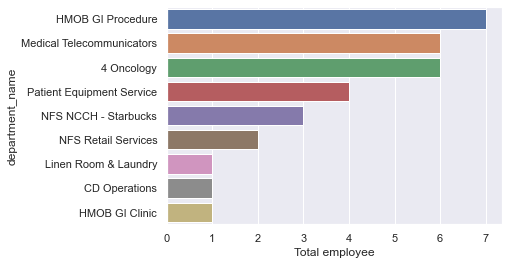

In [46]:
sns.barplot(y="department_name",x="Total employee",data=df)
plt.show()

In [85]:
total_salary=[]
for items in df['Total Salary']:
    total_salary.append(items[3:])

In [86]:
for i,item in enumerate(total_salary):
    total_salary[i]=float(item.replace(",",''))

In [87]:
total_salary

[72067.0, 61671.0, 41849.0, 35376.0, 19490.0, 19320.0, 11158.0, 6965.0, 2793.0]

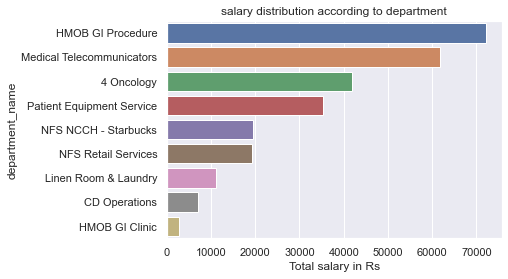

In [92]:
sns.barplot(y="department_name",x=total_salary,data=df)
plt.xlabel("Total salary in Rs")
plt.title("salary distribution according to department")
plt.show()

# D

Clients want to analyze if any employee has to cover for other team members regularly.

In [94]:
try:
    connection = connect()
    cursor = connection.cursor()
    
    query = '''
    
  
    
    SELECT * FROM 
    attendence a
    INNER JOIN punch_apply_date p
        ON a.punch_apply_date = p.date
    INNER JOIN paycode
        ON a.paycode_id = paycode.id
    WHERE a.employee_id=1377208 AND paycode_name='CHARGE'
        
    
    '''
    
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,employee_id,cost_center,punch_in_time,punch_out_time,punch_apply_date,paycode_id,hours_worked,date,day_of_month,month,year,week_day,id,paycode_name
0,1,1377208,53410,None,None,2021-04-23,A,1.0,2021-04-23,23,04,2021,4,A,CHARGE
1,441,1377208,53410,None,None,2021-05-03,A,1.0,2021-05-03,03,05,2021,0,A,CHARGE
2,764,1377208,53410,None,None,2021-05-10,A,1.0,2021-05-10,10,05,2021,0,A,CHARGE
3,1104,1377208,53410,None,None,2021-05-17,A,2.0,2021-05-17,17,05,2021,0,A,CHARGE
4,1519,1377208,53410,None,None,2021-05-25,A,2.0,2021-05-25,25,05,2021,1,A,CHARGE
5,1619,1377208,53410,None,None,2021-05-27,A,1.0,2021-05-27,27,05,2021,3,A,CHARGE
6,1675,1377208,53410,None,None,2021-05-28,A,2.0,2021-05-28,28,05,2021,4,A,CHARGE
7,1955,1377208,53410,None,None,2021-06-03,A,2.0,2021-06-03,03,06,2021,3,A,CHARGE
8,2328,1377208,53410,None,None,2021-06-11,A,3.0,2021-06-11,11,06,2021,4,A,CHARGE
9,2516,1377208,53410,None,None,2021-06-15,A,3.0,2021-06-15,15,06,2021,1,A,CHARGE
